# Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

**Obesity** has become a threat to our civilization. The problems result from obesity are both physically and mentally harmful, like cardiovascular diseases, diabetes, or depression. This can put pressure on not only individuals but also the health care or medical system of the government. 

There are different factors that might lead to this problem, for example, environment, lifestyle or habit. Here in this project, I want to identify whether the **types of restaurants** of the given area have a relationship with the **obesity rate**, and further examine if the **obesity rate** and **personal income** are related.

I will use data science powers to find the correlation between **types of restaurants, obesity rate, and personal income**. Hopefully, we can gain insight that helps tackle the obesity problem at its roots for the stakeholders, including the government, society and every person.

## Data <a name="data"></a>

Based on the problem, we need to examine the following factors:
* obesity rate
* types of popular restaurants
* personal income

Because of the availability of the dataset on the Internet, we can only get the city-level obesity rate and county-level personal income data.  
Following sources will be needed to generate the required information:
* obesity among adults of 500 cities using csv file from **https://catalog.data.gov/dataset/500-cities-city-level-data-gis-friendly-format-845f9**
* the list of categories of the most checked-in restaurants in the city using **Foursquare API**
* the personal income of the counties using csv file from **https://www.bea.gov/data/income-saving/personal-income-county-metro-and-other-areas**
* the county name of the given cities using csv file from **https://simplemaps.com/data/us-cities**

### Obesity Rate
First, clean the dataset, get the obesity rate and its relevant location data.

In [1]:
import pandas as pd
health_data = pd.read_csv('https://data.cdc.gov/api/views/dxpw-cm5u/rows.csv?accessType=DOWNLOAD')
health_data.rename(columns={'StateAbbr':'State',
                          'PlaceName':'City',
                          'OBESITY_AdjPrev':'Obesity',
                           'Population2010':'Population'}, inplace=True)
health_data.head()

,State,City,PlaceFIPS,Population,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ACCESS2_AdjPrev,ACCESS2_Adj95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,...,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,TEETHLOST_AdjPrev,TEETHLOST_Adj95CI,Geolocation
0,CA,Folsom,624638,72203,7.5,"( 7.0, 8.0)",7.7,"( 7.2, 8.2)",16.9,"(16.6, 17.2)",...,"(32.7, 33.5)",1.9,"( 1.9, 2.0)",2.0,"( 2.0, 2.1)",6.8,"( 5.7, 8.0)",6.8,"( 5.7, 7.9)","(38.67504943280, -121.147605753)"
1,FL,Largo,1239425,77648,19.6,"(19.1, 20.2)",20.9,"(20.4, 21.5)",30.6,"(30.3, 30.9)",...,"(39.5, 40.1)",4.5,"( 4.4, 4.7)",3.2,"( 3.2, 3.3)",18.3,"(16.9, 19.8)",18.0,"(16.7, 19.4)","(27.90909077340, -82.7714203383)"
2,CA,Berkeley,606000,112580,7.7,"( 7.3, 8.1)",7.1,"( 6.8, 7.3)",15.1,"(15.0, 15.3)",...,"(32.3, 32.7)",1.9,"( 1.8, 1.9)",2.3,"( 2.2, 2.3)",6.7,"( 6.2, 7.2)",6.8,"( 6.3, 7.4)","(37.87256787650, -122.274907975)"
3,CA,Napa,650258,76915,12.3,"(11.8, 12.8)",12.7,"(12.1, 13.3)",20.7,"(20.5, 21.0)",...,"(32.7, 33.3)",2.8,"( 2.7, 2.9)",2.6,"( 2.5, 2.7)",11.2,"(10.0, 12.5)",11.2,"(10.0, 12.3)","(38.29804246490, -122.301093331)"
4,FL,Sunrise,1269700,84439,22.8,"(22.1, 23.5)",23.3,"(22.6, 24.1)",22.8,"(22.5, 23.1)",...,"(38.3, 38.8)",3.7,"( 3.5, 3.8)",3.3,"( 3.2, 3.4)",16.2,"(14.3, 18.5)",15.8,"(14.2, 17.7)","(26.15468783030, -80.2998411020)"


In [2]:
# extract Latitude and Longitude from Geolocation
health_data['Latitude'] = [float(item.strip('()').split(',')[0]) for item in health_data['Geolocation']]
health_data['Longitude'] = [float(item.strip('()').split(',')[1]) for item in health_data['Geolocation']]
# creat new column Location
health_data['Location']= [item[1]+', '+item[0] for item in health_data.values]
# remain only the required columns
health_data = health_data[['Location', 'State', 'City', 'Obesity','Population', 'Latitude', 'Longitude']]
health_data.sort_values('Obesity').head()

,Location,State,City,Obesity,Population,Latitude,Longitude
187,"Fremont, CA",CA,Fremont,15.3,214089,37.527869,-121.984122
291,"Milpitas, CA",CA,Milpitas,15.7,66790,37.433870,-121.892083
259,"Boulder, CO",CO,Boulder,16.6,97385,40.027551,-105.251518
380,"Irvine, CA",CA,Irvine,16.7,212375,33.678011,-117.773633
304,"Union City, CA",CA,Union City,17.0,69516,37.602839,-122.018966


Visualize the cities.

In [6]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
from math import ceil
import branca

obesity_map = folium.Map(location=[39.911000, -99.529032], zoom_start=4)

# set color scheme for different ranges of obesity
legend = branca.colormap.linear.YlGnBu_09.scale(15, 50)
legend = legend.to_step(index=[15, 20, 25, 30, 35, 40, 45, 50])
legend.caption = 'Obesity Rate (%)'
legend.add_to(obesity_map)

# add markers to the map
markers_colors = []
for lat, lon, city, st, ob in zip(health_data['Latitude'], health_data['Longitude'], health_data['City'], health_data['State'], health_data['Obesity']):
    label = folium.Popup('{}, {}, {}'.format(ob, city, st), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=legend.rgb_hex_str(ob),
        fill=True,
        fill_color=legend.rgb_hex_str(ob),
        fill_opacity=0.7).add_to(obesity_map)
       
obesity_map

### Popular restaurants
Second, get the list of the most checked-in restaurants of the 500 cities mentioned above.

In [7]:
# The code was removed by Watson Studio for sharing.

In [8]:
VERSION = '20190606'
LIMIT = 50
food_search_id = '4d4b7105d754a06374d81259' #Food

Let's search venues near each city with the food category.

In [9]:
import requests
cities_food_results=[]

# search venues within the category of food
for city in health_data.values:
    city_state = city[0]
    food_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&near={}&v={}&categoryId={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, city_state, VERSION, food_search_id, LIMIT)        
    results = requests.get(food_url).json()
    cities_food_results.append(results)

In [10]:
# The code was removed by Watson Studio for sharing.

Transform the JSON format data into pandas dataframe and organize it.

In [11]:
from pandas.io.json import json_normalize

# assign relevant part of JSON to venues   
food_venues = []
for city in cities_food_results:
    food_venues += city['response']['venues']
    
# tranform venues into a dataframe
food_df = json_normalize(food_venues)
food_df.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,events.count,events.items,events.summary,...,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'pluralName': 'Coffee Shops', 'id': '4bf58dd...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[500 Natoma Station Dr (at Blue Ravine Rd), Fo...","[{'lat': 38.65522183009797, 'lng': -121.178396...",38.655222,-121.178396,NaN,95630,CA,Starbucks,v-1560000016,NaN
1,"[{'pluralName': 'Sushi Restaurants', 'id': '4b...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[1600 Ethan Way Ste 10 (at Arden Way), Sacrame...","[{'lat': 38.59378, 'lng': -121.41904, 'label':...",38.593780,-121.419040,NaN,95825,CA,Kura Revolving Sushi Bar,v-1560000016,NaN
2,"[{'pluralName': 'Food Courts', 'id': '4bf58dd8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[629 J St (at 7th St), Sacramento, CA 95814, U...","[{'lat': 38.58161144557864, 'lng': -121.497487...",38.581611,-121.497487,NaN,95814,CA,The Bank,v-1560000016,NaN
3,"[{'pluralName': 'Bakeries', 'id': '4bf58dd8d48...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[Elk Grove, CA 95624, United States]","[{'lat': 38.444766688832615, 'lng': -121.39644...",38.444767,-121.396444,NaN,95624,CA,Islander's Bakery,v-1560000016,NaN
4,"[{'pluralName': 'Coffee Shops', 'id': '4bf58dd...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[5539 H St, Sacramento, CA 95819, United States]","[{'lat': 38.56758228, 'lng': -121.4343712, 'la...",38.567582,-121.434371,NaN,95819,CA,Starbucks,v-1560000016,NaN


In [12]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in food_df.columns if col.startswith('location.')] + ['id']
food_df_filtered = food_df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
food_df_filtered['categories'] = food_df_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
food_df_filtered.columns = [column.split('.')[-1] for column in food_df_filtered.columns]
food_df_filtered = food_df_filtered[['state', 'city', 'categories', 'name', 'lat', 'lng']]

food_df_filtered.head()

,state,city,categories,name,lat,lng
0,CA,Folsom,Coffee Shop,Starbucks,38.655222,-121.178396
1,CA,Sacramento,Sushi Restaurant,Kura Revolving Sushi Bar,38.593780,-121.419040
2,CA,Sacramento,Food Court,The Bank,38.581611,-121.497487
3,CA,Elk Grove,Bakery,Islander's Bakery,38.444767,-121.396444
4,CA,Sacramento,Coffee Shop,Starbucks,38.567582,-121.434371


In [13]:
# create a Location column
food_df_filtered['Location']= [str(item[1])+', '+str(item[0]) for item in food_df_filtered.values]
# remain only the venues that the location appears in the health_data
food_df_filtered = food_df_filtered[food_df_filtered['Location'].isin(health_data['Location'])]
# rename the category
food_df_filtered['categories'].replace({'New American Restaurant': 'American Restaurant'}, inplace=True)
food_df_filtered.shape

(18047, 7)

In [14]:
# group the data by category and remain only the ones that appear more than 20 times
food_df_filtered_by_category = food_df_filtered.groupby(['categories']).count().sort_values(by='state')
food_df_filtered_by_category = food_df_filtered_by_category[(food_df_filtered_by_category['state'] >= 20)]

In [15]:
# delete the categories we do not want
dlt_categories = set(['Gay Bar','Beer Bar','Hookah Bar','Beer Garden','Pub','Juice Bar','Deli / Bodega','Sports Bar','Bar','Coffee Shop','Café','Butcher','Arcade','Lounge','Truck Stop','Student Center','Health Food Store','Hospital','Motorcycle Shop','Miscellaneous Shop', 'College Library', 'Gym', 'Office', 'Resort', 'Park', 'Spa', 'Bowling Alley', 'Movie Theater', 'Market', 'Casino', 'Hotel', 'College Academic Building', 'Historic Site', 'Farmers Market', 'College Bookstore', 'Furniture / Home Store', 'Bookstore', 'Airport Food Court', 'Farm', 'Organic Grocery', 'Shopping Mall', 'Multiplex', 'Supermarket', 'Winery', 'Music Venue', 'Grocery Store', 'Golf Course', 'Convenience Store', 'Concert Hall', 'Brewery', 'General College & University', 'Speakeasy', 'Hotel Bar', 'History Museum', 'Gas Station', 'Electronics Store'])
dlt_categories = set(food_df_filtered_by_category.index.values) - (set(food_df_filtered_by_category.index.values) - dlt_categories)
food_df_filtered_by_category.drop(dlt_categories, inplace=True)
food_df_filtered = food_df_filtered[food_df_filtered['categories'].isin(food_df_filtered_by_category.index)]
food_df_filtered.shape

(10829, 7)

In [16]:
# group the data by Location and remain only the ones that have more than 30 venues
food_df_filtered30 = food_df_filtered.groupby(['Location']).count().sort_values(by=['categories']).reset_index()
food_df_filtered30 = food_df_filtered30[food_df_filtered30['categories']>=30]
food_df_filtered = food_df_filtered[food_df_filtered['Location'].isin(food_df_filtered30['Location'])]
food_df_filtered.shape

(7652, 7)

In [17]:
food_df_filtered.head()

,state,city,categories,name,lat,lng,Location
1,CA,Sacramento,Sushi Restaurant,Kura Revolving Sushi Bar,38.593780,-121.419040,"Sacramento, CA"
2,CA,Sacramento,Food Court,The Bank,38.581611,-121.497487,"Sacramento, CA"
5,CA,Sacramento,American Restaurant,Yard House,38.581382,-121.501619,"Sacramento, CA"
6,CA,Sacramento,Steakhouse,Echo & Rig,38.581521,-121.499316,"Sacramento, CA"
15,CA,Sacramento,American Restaurant,Esquire Grill,38.695456,-121.592825,"Sacramento, CA"


### Personal Income
Third, I have downloaded and cleaned the file using Excel. Now we just need to open it from directory. I will put a copy in my github repository.  
The unit of income is dollars/annual and the data is from 2017.

In [38]:
# The code was removed by Watson Studio for sharing.

In [39]:
income = pd.read_csv(body)
income['County'] = [item[0] + ', ' + item[2] for item in income.values]
income.drop(columns=['State'], inplace=True)
income.head()

,County,Income
0,"Autauga, AL",40484
1,"Baldwin, AL",44079
2,"Barbour, AL",33453
3,"Bibb, AL",30022
4,"Blount, AL",33707


### City and County
The last, we need a table of city and its related county name to join the *health_data* and *income*.  
I have also pre-cleaned the file using Excel and will put a copy in my github repository.

In [40]:
body = client_959d2064269b4e86949f02d09f0cf2d9.get_object(Bucket='capstoneproject-donotdelete-pr-7m6ok3wlmollpg',Key='us_cities.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

us_cities = pd.read_csv(body)
us_cities['Location'] = [item[0] + ', '+ item[1] for item in us_cities.values]
us_cities.drop(columns=['city', 'state', 'county_fips'], inplace=True)
us_cities.head()

,county_name,Location
0,Pierce,"Prairie Ridge, WA"
1,Skagit,"Edison, WA"
2,Lewis,"Packwood, WA"
3,Kitsap,"Wautauga Beach, WA"
4,Kitsap,"Harper, WA"


## Methodology <a name="methodology"></a>

In this project, we will try to find a relationship between the obesity rate, and the types of restaurants and personal income. We will limit the dataset to cities that has more than 30 venues and the categories that has more than 20 venues.

In [Data](#data) section, we have collected to required **data: obesity rate and popular food venues of the cities, personal income of the counties and the data that can join city and county data**.  

In the second step, we will explore the most popular categories of food venues across different cities, and use K-means to divide the cities to 2 clusters. Each cluster should have similar composition of the types of restaurants. Then we will compare the 2 clusters with the obesity rate. Is there a significant difference between?

In the third step, we will group the cities by their county, and compare the personal income. Is there a relationship between the obesity rate and personal income? 

## Analysis <a name="analysis"></a>

Transform the data by one hot encoding.

In [41]:
# one hot encoding
cities_onehot = pd.get_dummies(food_df_filtered[['categories']], prefix="", prefix_sep="")

# add location column back to dataframe
cities_onehot['Location'] = food_df_filtered['Location'] 

# move location column to the first column
fixed_columns = [cities_onehot.columns[-1]] + list(cities_onehot.columns[:-1])
cities_onehot = cities_onehot[fixed_columns]

cities_onehot.head()

,Location,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,...,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
1,"Sacramento, CA",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,"Sacramento, CA",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Sacramento, CA",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,"Sacramento, CA",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15,"Sacramento, CA",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Group rows by Location and by taking the mean of the frequency of occurrence of each category.

In [42]:
cities_grouped = cities_onehot.groupby(['Location']).mean().reset_index()
cities_grouped.head()

,Location,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,...,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,"Abilene, TX",0.146341,0.000000,0.000000,0.000000,0.024390,0.000000,0.0,0.000000,0.097561,...,0.000000,0.024390,0.0,0.000000,0.073171,0.000000,0.000000,0.0,0.0,0.048780
1,"Albany, GA",0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.025641,0.025641,...,0.025641,0.051282,0.0,0.000000,0.000000,0.025641,0.025641,0.0,0.0,0.025641
2,"Albuquerque, NM",0.245614,0.000000,0.035088,0.017544,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.035088
3,"Amarillo, TX",0.055556,0.000000,0.055556,0.000000,0.000000,0.027778,0.0,0.000000,0.111111,...,0.000000,0.055556,0.0,0.027778,0.000000,0.055556,0.000000,0.0,0.0,0.027778
4,"Anaheim, CA",0.103070,0.013158,0.002193,0.000000,0.107456,0.000000,0.0,0.000000,0.085526,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


A function to sort the venues in descending order.

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[3:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create a new dataframe and display the top 10 venues for each city.

In [44]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted[['Location']] = cities_grouped[['Location']]

for ind in np.arange(cities_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cities_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted.head()

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Abilene, TX",Fast Food Restaurant,Mexican Restaurant,Burger Joint,Tex-Mex Restaurant,Chinese Restaurant,Restaurant,Italian Restaurant,Wings Joint,Bakery,Donut Shop
1,"Albany, GA",Fast Food Restaurant,Mexican Restaurant,Sandwich Place,Seafood Restaurant,Steakhouse,Wings Joint,Italian Restaurant,Burger Joint,Restaurant,Buffet
2,"Albuquerque, NM",Fast Food Restaurant,Mexican Restaurant,Food Court,Wings Joint,Seafood Restaurant,Donut Shop,Hot Dog Joint,Pizza Place,Restaurant,BBQ Joint
3,"Amarillo, TX",Fast Food Restaurant,Burger Joint,Mexican Restaurant,BBQ Joint,Restaurant,Thai Restaurant,Steakhouse,Sandwich Place,Breakfast Spot,Cafeteria
4,"Anaheim, CA",Bakery,Italian Restaurant,Burger Joint,Middle Eastern Restaurant,Ice Cream Shop,Diner,Cajun / Creole Restaurant,Fast Food Restaurant,Mexican Restaurant,Mediterranean Restaurant


Run k-means to cluster the city into 2 clusters.

In [45]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 2

cities_grouped_clustering = cities_grouped.drop(['Location'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cities_grouped_clustering)
k_means_labels = kmeans.labels_

# check cluster labels generated for each row in the dataframe
kmeans.labels_[:]

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

Create a dataframe that contains the health data only with the city we are analyzing.

In [46]:
cities_data = health_data[(health_data['Location'].isin(cities_venues_sorted['Location']))]
cities_data.set_index(['Location'], inplace=True)
cities_data.head()

,State,City,Obesity,Population,Latitude,Longitude
Location,,,,,,
"Napa, CA",CA,Napa,24.0,76915,38.298042,-122.301093
"Sunrise, FL",FL,Sunrise,28.2,84439,26.154688,-80.299841
"Pueblo, CO",CO,Pueblo,30.7,106595,38.273396,-104.612001
"Austin, TX",TX,Austin,26.1,790390,30.306861,-97.755477
"Oklahoma City, OK",OK,Oklahoma City,32.9,579999,35.467564,-97.513762


Create a new dataframe that includes the cluster as well as the top 10 venues for each city.

In [47]:
# add clustering labels
cities_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

cities_merged = cities_data
cities_venues_sorted.set_index(['Location'], inplace=True)
# merge cities_grouped with cities_data to add latitude/longitude for each city
cities_merged = cities_merged.join(cities_venues_sorted)
fixed_columns = [cities_merged.columns[2]] + [cities_merged.columns[6]] + list(cities_merged.columns[7:-1]) + list(cities_merged.columns[-1:2]) + list(cities_merged.columns[3:6])
cities_merged = cities_merged[fixed_columns]

cities_merged.head()

,Obesity,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,Population,Latitude,Longitude
Location,,,,,,,,,,,,,,
"Napa, CA",24.0,1,Burger Joint,Restaurant,Italian Restaurant,Bakery,Seafood Restaurant,Sushi Restaurant,BBQ Joint,Buffet,Bubble Tea Shop,76915,38.298042,-122.301093
"Sunrise, FL",28.2,1,Sandwich Place,Chocolate Shop,Fast Food Restaurant,Sushi Restaurant,Mexican Restaurant,Chinese Restaurant,Pizza Place,Food Court,Dumpling Restaurant,84439,26.154688,-80.299841
"Pueblo, CO",30.7,0,Fast Food Restaurant,Mexican Restaurant,Pizza Place,Sandwich Place,Burger Joint,Steakhouse,Italian Restaurant,Dessert Shop,Restaurant,106595,38.273396,-104.612001
"Austin, TX",26.1,1,BBQ Joint,Taco Place,Food Court,Mexican Restaurant,Pizza Place,Donut Shop,Italian Restaurant,Restaurant,Tex-Mex Restaurant,790390,30.306861,-97.755477
"Oklahoma City, OK",32.9,0,Fast Food Restaurant,Mexican Restaurant,Restaurant,Breakfast Spot,Taco Place,Sandwich Place,Pizza Place,Steakhouse,Food Court,579999,35.467564,-97.513762


Let's visualize the cluster.

In [48]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

cluster_map = folium.Map(location=[39.911000, -99.529032], zoom_start=4)

# set color scheme for the clusters
rainbow = ['red', 'green']

# add markers to the map
markers_colors = []
for lat, lon, loc, cluster in zip(cities_merged['Latitude'], cities_merged['Longitude'], cities_merged.index, cities_merged['Cluster Labels']):
    label = folium.Popup(str(loc) + ', Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        opacity=0.5,
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.5).add_to(cluster_map)
       
cluster_map

As we can see, the cities of the cluster 1 are those that are more developed and well-known.

Let's plot the data in the scatter chart to better understand the distribution of obesity for each cluster.

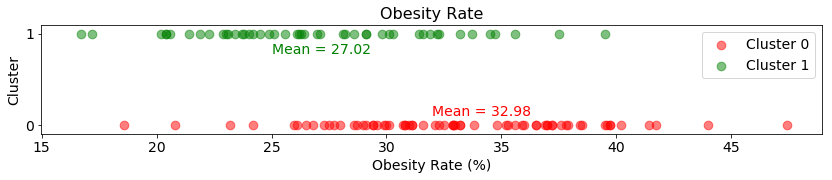

In [49]:
import matplotlib.pyplot as plt # plotting library
%matplotlib inline 

cluster0 = cities_merged[cities_merged['Cluster Labels']==0]
cluster1 = cities_merged[cities_merged['Cluster Labels']==1]
obmean0 = round(cluster0.groupby('Cluster Labels').mean()['Obesity'].values[0], 2)
obmean1 = round(cluster1.groupby('Cluster Labels').mean()['Obesity'].values[0], 2)

ax0 = cluster0.plot(kind='scatter',
                    x='Obesity',
                    y='Cluster Labels',
                    figsize=(14, 2),
                    alpha=0.5,
                    color='red',
                    fontsize=14,
                    s=300,
                    marker='.',
                    yticks=[0,1],
                    label='Cluster 0')
ax1 = cluster1.plot(kind='scatter',
                    x='Obesity',
                    y='Cluster Labels',
                    alpha=0.5,
                    color='green',
                    marker='.',
                    s=300,
                    label='Cluster 1',
                    ax=ax0)
ax0.legend(loc='upper right', fontsize=14)
ax0.set_xlabel('Obesity Rate (%)', fontsize=14)
ax0.set_ylabel('Cluster', fontsize=14)
ax0.set_title('Obesity Rate', fontsize=16)
ax0.annotate('Mean = ' + str(obmean0), xy=(32, 0.1), fontsize=14,  color='red')
ax0.annotate('Mean = ' + str(obmean1), xy=(25, 0.78), fontsize=14, color='green')

plt.show()

The mean obesity rate of Cluster 1 is significantly lower than Cluster 2.

Now let's look into the cluster and see what are the common venues.  
For this Cluster, it's obvious that the most checked-in venue is Fast Food Restaurant.

In [50]:
cities_merged.loc[cities_merged['Cluster Labels'] == 0, cities_merged.columns[list(range(0, cities_merged.shape[1]))]]

,Obesity,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,Population,Latitude,Longitude
Location,,,,,,,,,,,,,,
"Pueblo, CO",30.7,0,Fast Food Restaurant,Mexican Restaurant,Pizza Place,Sandwich Place,Burger Joint,Steakhouse,Italian Restaurant,Dessert Shop,Restaurant,106595,38.273396,-104.612001
"Oklahoma City, OK",32.9,0,Fast Food Restaurant,Mexican Restaurant,Restaurant,Breakfast Spot,Taco Place,Sandwich Place,Pizza Place,Steakhouse,Food Court,579999,35.467564,-97.513762
"Lake Charles, LA",40.2,0,Fast Food Restaurant,Seafood Restaurant,Steakhouse,Cajun / Creole Restaurant,Fried Chicken Joint,Bakery,Gastropub,Diner,Mexican Restaurant,71993,30.203068,-93.214880
"Clarksville, TN",37.8,0,Fast Food Restaurant,Steakhouse,Fried Chicken Joint,Japanese Restaurant,Restaurant,Wings Joint,Mexican Restaurant,Bakery,Breakfast Spot,132929,36.569683,-87.343237
"Tampa, FL",29.0,0,Fast Food Restaurant,Food Court,Mexican Restaurant,Pizza Place,Theme Restaurant,Chinese Restaurant,Cuban Restaurant,Wings Joint,Food Truck,335709,27.996198,-82.445035
"Santa Fe, NM",18.6,0,Mexican Restaurant,Fast Food Restaurant,Diner,Food Truck,Bakery,Pizza Place,Donut Shop,Japanese Restaurant,Dessert Shop,67947,35.666272,-105.972663
"Greensboro, NC",36.5,0,Fast Food Restaurant,Burger Joint,Bagel Shop,Chinese Restaurant,BBQ Joint,Cuban Restaurant,French Restaurant,Food Truck,Food Court,269666,36.096048,-79.827683
"Sioux City, IA",37.0,0,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Steakhouse,Sandwich Place,Food Court,Diner,Fried Chicken Joint,Gastropub,82684,42.496315,-96.391383
"Springfield, IL",35.9,0,Fast Food Restaurant,Pizza Place,Italian Restaurant,Bakery,Diner,Wings Joint,Breakfast Spot,Buffet,Chinese Restaurant,116250,39.771647,-89.654078


For the second cluster, compare to the first one, the composition of the venues are more diverse.

In [51]:
cities_merged.loc[cities_merged['Cluster Labels'] == 1, cities_merged.columns[list(range(0, cities_merged.shape[1]))]]

,Obesity,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,Population,Latitude,Longitude
Location,,,,,,,,,,,,,,
"Napa, CA",24.0,1,Burger Joint,Restaurant,Italian Restaurant,Bakery,Seafood Restaurant,Sushi Restaurant,BBQ Joint,Buffet,Bubble Tea Shop,76915,38.298042,-122.301093
"Sunrise, FL",28.2,1,Sandwich Place,Chocolate Shop,Fast Food Restaurant,Sushi Restaurant,Mexican Restaurant,Chinese Restaurant,Pizza Place,Food Court,Dumpling Restaurant,84439,26.154688,-80.299841
"Austin, TX",26.1,1,BBQ Joint,Taco Place,Food Court,Mexican Restaurant,Pizza Place,Donut Shop,Italian Restaurant,Restaurant,Tex-Mex Restaurant,790390,30.306861,-97.755477
"Miami, FL",29.8,1,Cuban Restaurant,Italian Restaurant,Chocolate Shop,Bagel Shop,Fast Food Restaurant,Sushi Restaurant,Steakhouse,Mediterranean Restaurant,Fried Chicken Joint,399457,25.782296,-80.221565
"Sioux Falls, SD",31.9,1,Fast Food Restaurant,Mexican Restaurant,Restaurant,Fried Chicken Joint,Food Court,Bakery,Sandwich Place,Chinese Restaurant,Diner,153888,43.538807,-96.731350
"San Diego, CA",20.4,1,Burger Joint,Bakery,Mexican Restaurant,Ice Cream Shop,Seafood Restaurant,Food Court,Restaurant,BBQ Joint,Dumpling Restaurant,1307402,32.835564,-117.119792
"Las Vegas, NV",27.0,1,Italian Restaurant,Burger Joint,Buffet,Seafood Restaurant,Pizza Place,French Restaurant,Theme Restaurant,Sandwich Place,Food Court,583756,36.227415,-115.262670
"Wichita, KS",31.6,1,Fast Food Restaurant,Restaurant,Donut Shop,Ice Cream Shop,Mexican Restaurant,Pizza Place,Bakery,Wings Joint,Italian Restaurant,382368,37.690561,-97.342937
"Seattle, WA",23.1,1,Bakery,Burger Joint,Ice Cream Shop,Dumpling Restaurant,Mexican Restaurant,Wings Joint,Italian Restaurant,Breakfast Spot,Dessert Shop,608660,47.622154,-122.323532


Generally speaking, from the result of the two clusters, we can know that the city which the first common venue is fast food restaurant, has higher obesity rate, while the city that is more diverse in its food venue preference, has lower obesity rate.

Now Let's see if the income is also an influencing factor.  
Merge the *health_data* and *income* using the *us_cities* data.

In [52]:
health_data2 = us_cities.merge(health_data, on=['Location'])
health_data2['County'] = [item[0] + ', ' + item[2] for item in health_data2.values]
health_data2.drop(columns=['county_name','City','Latitude','Longitude','State'], inplace=True)
us_cities_income = health_data2.merge(income, on=['County'])
us_cities_income.dropna(inplace=True)
us_cities_income.set_index('Location', inplace=True)
us_cities_income.head()

,Obesity,Population,County,Income
Location,,,,
"Renton, WA",24.2,90927,"King, WA",83383
"Seattle, WA",23.1,608660,"King, WA",83383
"Federal Way, WA",26.7,89306,"King, WA",83383
"Auburn, WA",27.7,70180,"King, WA",83383
"Kent, WA",27.4,92411,"King, WA",83383


Merge the clusters and the income data.

In [53]:
cities_merged_income = cities_merged[['Cluster Labels']].join(us_cities_income)
cities_merged_income.dropna(inplace=True)
cities_merged_income.sort_values('Cluster Labels').head()

,Cluster Labels,Obesity,Population,County,Income
Location,,,,,
"Indianapolis, IN",0,33.2,820445.0,"Marion, IN",50957.0
"Milwaukee, WI",0,38.5,594833.0,"Milwaukee, WI",45099.0
"Rochester, MN",0,26.8,106769.0,"Olmsted, MN",54194.0
"Rapid City, SD",0,28.7,67956.0,"Pennington, SD",48587.0
"Victorville, CA",0,31.0,115903.0,"San Bernardino, CA",38816.0


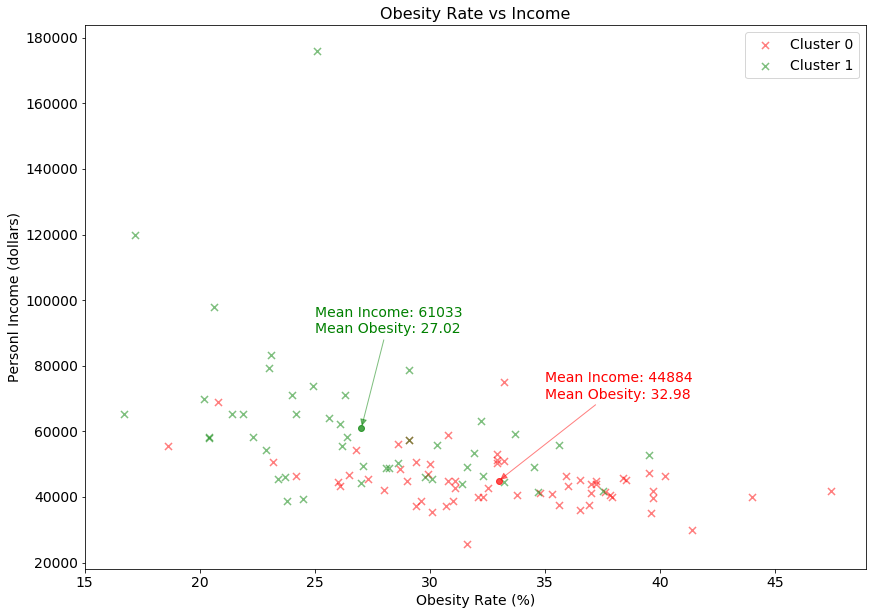

In [54]:
import matplotlib.pyplot as plt # plotting library
%matplotlib inline

cluster0 = cities_merged_income[cities_merged_income['Cluster Labels']==0]
cluster1 = cities_merged_income[cities_merged_income['Cluster Labels']==1]
inmean0 = int(cities_merged_income.groupby('Cluster Labels').mean()['Income'].values[0])
inmean1 = int(cities_merged_income.groupby('Cluster Labels').mean()['Income'].values[1])

ax0 = cluster0.plot(kind='scatter',
                    x='Obesity',
                    y='Income',
                    figsize=(14, 10),
                    alpha=0.5,
                    color='red',
                    fontsize=14,
                    s=50,
                    marker='x',
                    label='Cluster 0')
ax1 = cluster1.plot(kind='scatter',
                    x='Obesity',
                    y='Income',
                    alpha=0.5,
                    color='green',
                    marker='x',
                    s=50,
                    label='Cluster 1',
                    ax=ax0)
ax0.legend(loc='upper right', fontsize=14)
ax0.set_xlabel('Obesity Rate (%)', fontsize=14)
ax0.set_ylabel('Personl Income (dollars)', fontsize=14)
ax0.set_title('Obesity Rate vs Income', fontsize=16)
ax0.plot([obmean0], [inmean0], 'o', color='red', alpha=0.7)
ax0.annotate('Mean Income: {}\nMean Obesity: {}'.format(inmean0, obmean0), 
             xy=(obmean0, inmean0), 
             xytext=(35, 70000),
             fontsize=14,  
             color='red',
             arrowprops=dict(color='red', arrowstyle = "-|>", alpha=0.5))
ax0.plot([obmean1], [inmean1], 'o', color='green', alpha=0.7)
ax0.annotate('Mean Income: {}\nMean Obesity: {}'.format(inmean1, obmean1), 
             xy=(obmean1, inmean1),
             xytext=(25, 90000),
             fontsize=14, 
             color='green',
             arrowprops=dict(color='green', arrowstyle = "-|>", alpha=0.5))

plt.show()

As we can see, the personal income might be an influencing factor of obesity rate.  
The lower the income is, the higher chance of obesity one city has. On the contrary, the richer cities have lower obesity rate.

## Results and Discussion <a name="results"></a>

Our analysis shows that income and eating habits might have something to do with obesity. By gathering the most checked-in food venues in cities from Foursquare, we clustered those who share similar types of food venues into two groups. Then from the calculation of the mean obesity from two clusters, we knew the cities which the most popular food venue is fast food restaurant are usually more overweight. Moreover, as we look into the personal income data, we know that the cities which are more wealthy usually have normal weight. Especially when we look into the lower obesity rate cluster, we can see the cities within the ones that are bigger, more developed, like Los Angeles, New York, San Fransisco, Seattle, Portland, Philadelphia, Phoenix, Denver, and Dallas.  

Obviously, obesity is not a personal problem. Sometimes people would think those who are overweight are lazy, lack the ability of self-control, or have other navigate behaviors. But as our analysis shows, obesity is might a social environment problem. People who live in poverty might go to a fast food restaurant more often because it is more affordable for them, and result in a higher chance of obesity.  

If the government wants to solve this problem, it is not only an issue of proposing a healthy lifestyle or provide diet program to people, it might be a poverty problem. And we should tackle this problem at its root like considering how to reduce the gap between rich and poor.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify if there is a relationship between the obesity rate and types of restaurants or personal income so our stakeholders can take action to solve this civilization disease. By clustering the cities to two groups which share similar characteristics and compare to obesity rate and personal income, we find a tendency that the more popular the fast food restaurant is in a city, the higher obesity rate and lower personal income it has. Contrarily, the higher income cities are usually not that obese and have a diverse choices of food venues.  

While rather take obesity as a personal problem, every stakeholder might considering paying attention on how to make everyone to not only affordable for fast food restaurant when they eat out.